In [5]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Read the image file
image_path = 'images/mario2.jpg'
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Convert the image from BGR to RGB
    print("Image loaded successfully.")

Image loaded successfully.


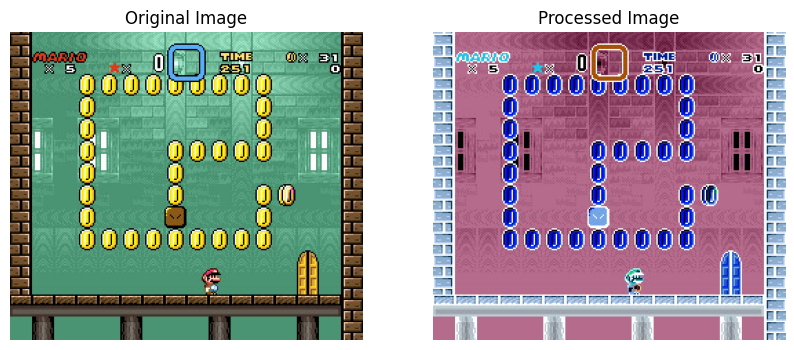

In [4]:
def invert_image(image):
    """
    Invert the colors of the given image.

    Parameters:
    image (numpy.ndarray): The input image in RGB format.

    Returns:
    numpy.ndarray: The color-inverted image.
    """
    return 255 - image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform some pixel processing (e.g., invert the colors)
processed_image =invert_image(image_rgb)

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Processed Image')
plt.imshow(processed_image)
plt.axis('off')

plt.show()

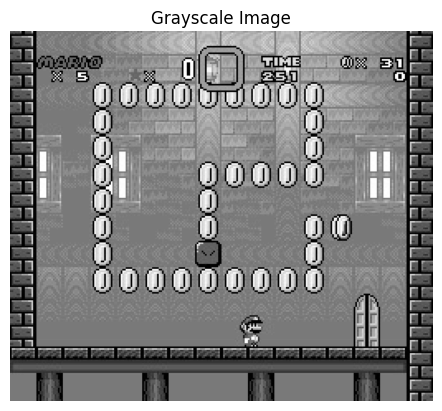

In [3]:
def convert_to_grayscale(image):
    """
    Convert the given image to grayscale.

    Parameters:
    image (numpy.ndarray): The input image in BGR format.

    Returns:
    numpy.ndarray: The grayscale image.
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Example usage:
grayscale_image = convert_to_grayscale(image)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [7]:

def adjust_colors(image):
    """
    Display sliders to adjust the blue, green, and red channels of the given image.

    Parameters:
    image (numpy.ndarray): The input image in BGR format.
    """
    def update_image(blue, green, red):
        adjusted_image = image.copy()
        adjusted_image[:, :, 0] = np.clip(image[:, :, 0] * blue, 0, 255)
        adjusted_image[:, :, 1] = np.clip(image[:, :, 1] * green, 0, 255)
        adjusted_image[:, :, 2] = np.clip(image[:, :, 2] * red, 0, 255)
        
        plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    blue_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.01, description='Blue')
    green_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.01, description='Green')
    red_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.01, description='Red')

    ui = widgets.VBox([blue_slider, green_slider, red_slider])
    out = widgets.interactive_output(update_image, {'blue': blue_slider, 'green': green_slider, 'red': red_slider})

    display(ui, out)

# Example usage:
adjust_colors(image)

Output()

In [6]:
def adjust_contrast_brightness(image):
    """
    Display sliders to adjust the contrast and brightness of the given image.

    Parameters:
    image (numpy.ndarray): The input image in BGR format.
    """
    def update_image(contrast, brightness):
        adjusted_image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
        
        plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    contrast_slider = widgets.FloatSlider(value=1.0, min=0.0, max=3.0, step=0.01, description='Contrast')
    brightness_slider = widgets.IntSlider(value=0, min=-100, max=100, step=1, description='Brightness')

    ui = widgets.VBox([contrast_slider, brightness_slider])
    out = widgets.interactive_output(update_image, {'contrast': contrast_slider, 'brightness': brightness_slider})

    display(ui, out)

# Example usage:
adjust_contrast_brightness(image)

Output()

In [9]:
def highlight_color(image, lower_bound, upper_bound):
    """
    Highlight a specific color in the image and make the rest grayscale.

    Parameters:
    image (numpy.ndarray): The input image in BGR format.
    lower_bound (tuple): The lower bound of the color to highlight (in BGR format).
    upper_bound (tuple): The upper bound of the color to highlight (in BGR format).

    Returns:
    numpy.ndarray: The image with the specified color highlighted and the rest in grayscale.
    """
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    # Create a mask for the specified color range
    mask = cv2.inRange(image, lower_bound, upper_bound)

    # Create an image that only contains the highlighted color
    highlighted_image = cv2.bitwise_and(image, image, mask=mask)

    # Combine the grayscale image and the highlighted image
    combined_image = cv2.addWeighted(grayscale_image, 1, highlighted_image, 1, 0)

    return combined_image

# Example usage:
def update_color(lower_h, lower_s, lower_v, upper_h, upper_s, upper_v):
    lower_bound = (lower_h, lower_s, lower_v)
    upper_bound = (upper_h, upper_s, upper_v)
    highlighted_image = highlight_color(image, lower_bound, upper_bound)
    
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title('Highlighted Color Image')
    plt.axis('off')
    plt.show()

lower_h_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='Lower H')
lower_s_slider = widgets.IntSlider(value=100, min=0, max=255, step=1, description='Lower S')
lower_v_slider = widgets.IntSlider(value=100, min=0, max=255, step=1, description='Lower V')
upper_h_slider = widgets.IntSlider(value=50, min=0, max=255, step=1, description='Upper H')
upper_s_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='Upper S')
upper_v_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='Upper V')

ui = widgets.VBox([lower_h_slider, lower_s_slider, lower_v_slider, upper_h_slider, upper_s_slider, upper_v_slider])
out = widgets.interactive_output(update_color, {'lower_h': lower_h_slider, 'lower_s': lower_s_slider, 'lower_v': lower_v_slider, 'upper_h': upper_h_slider, 'upper_s': upper_s_slider, 'upper_v': upper_v_slider})

display(ui, out)
# lower_bound = (0, 100, 100)  # Lower bound of the color to highlight (in BGR format)
# upper_bound = (50, 255, 255)  # Upper bound of the color to highlight (in BGR format)
# highlighted_image = highlight_color(image, lower_bound, upper_bound)

# plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
# plt.title('Highlighted Color Image')
# plt.axis('off')
# plt.show()

Output()